#Charting Zillow data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from bs4 import BeautifulSoup
import xmltodict
from pprint import pprint
import os
import csv
from api_keys import z_keys
from scipy.stats import sem
from scipy import stats as st

In [2]:
z1_df = pd.read_csv("/Users/JBagga/Downloads/OutputData.csv")
z1_df.head()

,Unnamed: 0,address,rent,sold,sold year,sqft,var,zipcode
0,0,189 E 7th St,NaN,3300000.0,2015.0,4200.0,1,10009
1,1,189 E 7th St,14995.0,4844809.0,2018.0,2183.0,0,10009
2,2,189 E 7th St,14995.0,NaN,NaN,NaN,2,10009
3,3,526 E 5th St,23000.0,6100000.0,2018.0,5200.0,0,10009
4,4,133 Avenue D APT 16,3995.0,NaN,NaN,NaN,2,10009


In [3]:
z2_df=z1_df[z1_df['rent']>0]

In [4]:
z2_df=z2_df[z2_df['sold']>100000]
z2_df['address'].value_counts()

245 W 99th St                          25
132 E 65th St # A                      21
220 E 65th St                          21
211 E 46th St                          20
301 E 79th St # 3                      18
112 W 18th St                          18
301 E 79th St # 4                      15
421 E 13th St                          14
27 W 72nd St                           12
315 7th Ave                            12
350 E 82nd St                          10
161 W 61st St                           9
220 Riverside Blvd                      9
1485 5th Ave                            9
360 E 88th St # 2A                      8
40 E 78th St                            8
155 W 11th St                           8
200 E 62nd St                           8
59 W 12th St                            8
9 Murray St # 15                        7
66 Leonard St                           7
200 Riverside Blvd                      7
426 W 52nd St                           7
1049 5th Ave # STRG3              

In [5]:
z2_df['rent'].value_counts()

3000.0     429
3500.0     375
3200.0     350
4500.0     249
10000.0    228
4000.0     194
23000.0    171
2600.0     168
6500.0     166
3300.0     148
3600.0     146
2800.0     144
14000.0    141
3100.0     140
2500.0     135
4200.0     133
8500.0     132
3250.0     126
3400.0     125
8000.0     120
2700.0     117
3800.0     114
7000.0     111
5500.0     110
7800.0     109
6000.0     107
3195.0     106
12500.0    106
4800.0     103
2750.0     102
          ... 
5325.0       1
4375.0       1
7608.0       1
4420.0       1
19250.0      1
6994.0       1
2125.0       1
5863.0       1
3653.0       1
2859.0       1
5073.0       1
13895.0      1
3280.0       1
7249.0       1
3757.0       1
21436.0      1
8648.0       1
3515.0       1
2889.0       1
3464.0       1
12780.0      1
4680.0       1
3687.0       1
2225.0       1
3656.0       1
3835.0       1
14540.0      1
2824.0       1
5143.0       1
1799.0       1
Name: rent, Length: 863, dtype: int64

In [6]:
z2_df.corr()

,Unnamed: 0,rent,sold,sold year,sqft,var,zipcode
Unnamed: 0,1.000000,-0.048303,-0.011095,-0.001740,0.051354,NaN,0.291251
rent,-0.048303,1.000000,0.375721,0.010855,-0.042160,NaN,-0.067988
sold,-0.011095,0.375721,1.000000,0.099250,0.063860,NaN,-0.046599
sold year,-0.001740,0.010855,0.099250,1.000000,0.088955,NaN,0.020342
sqft,0.051354,-0.042160,0.063860,0.088955,1.000000,NaN,-0.013846
var,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zipcode,0.291251,-0.067988,-0.046599,0.020342,-0.013846,NaN,1.000000


In [7]:
z2_df.head()

,Unnamed: 0,address,rent,sold,sold year,sqft,var,zipcode
1,1,189 E 7th St,14995.0,4844809.0,2018.0,2183.0,0,10009
3,3,526 E 5th St,23000.0,6100000.0,2018.0,5200.0,0,10009
26,26,203 E 7th St,20000.0,6250000.0,2018.0,5446.0,0,10009
27,27,187 E 7th St,1600.0,425000.0,2008.0,2310.0,0,10009
44,44,106 Nassau Ave # B,2749.0,2300000.0,2017.0,2500.0,0,10009


In [8]:
z2_df['zipcode'].value_counts()

10011    993
10016    882
10019    756
10023    722
10024    709
10013    608
10025    560
10014    545
10022    537
10021    529
10128    477
10003    430
10065    412
10028    382
10036    369
10026    366
10002    333
10001    323
10075    317
10017    272
10010    268
10029    241
10012    235
10007    202
10009    173
10280    158
10027    142
10031    129
10005    123
10018    101
10038     98
10033     71
10040     63
10034     60
10037     56
10030     53
10006     43
10032     36
10035     35
10044     31
10004     30
10069     22
10282     20
10463     16
10039     15
Name: zipcode, dtype: int64

In [9]:
# z3_df = z2_df.groupby('zipcode').agg('sum')

In [10]:
#z3_df['Price per Sq Ft'] = z3_df['']

In [11]:
# bins =[10000,10001,10002,10003,10004,10005,10006,10007,10009,10010,\
#        10011,10012,10013,10014,10016,10017,10018,10019,10020,\
#        10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,\
#        10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,\
#        10044,10065,10075,10128,10280]

# neighbor =["Chelsea and Clinton","Lower East Side","Lower East Side",\
#                "Lower Manhattan","Lower Manhattan","Lower Manhattan",\
#                "Lower Manhattan","Lower East Side","Gramercy Park and Murray Hill",\
#                "Chelsea and Clinton","Greenwich Village and Soho","Greenwich Village and Soho",\
#                "Greenwich Village and Soho","Gramercy Park and Murray Hill",\
#                "Gramercy Park and Murray Hill","Chelsea and Clinton","Chelsea and Clinton",\
#                "Chelsea and Clinton","Upper East Side","Gramercy Park and Murray Hill","Upper West Side",\
#                "Upper West Side","Upper West Side","Central Harlem","Central Harlem",\
#                "Upper East Side","East Harlem","Central Harlem","Inwood and Washington Heights",\
#                "Inwood and Washington Heights","Inwood and Washington Heights",\
#                "Inwood and Washington Heights","East Harlem","Chelsea and Clinton",\
#                "Central Harlem","Lower Manhattan","Central Harlem","Inwood and Washington Heights",\
#                "Upper East Side","Upper East Side","Upper East Side","Upper East Side","Lower Manhattan"] 

In [12]:
# z2_df['neighborhood'] =pd.cut(z2_df['zipcode'],bins,labels=neighbor)
# z2_df

# # df["Test Score Summary"] = pd.cut(df["Test Score"], bins, labels=group_names)

In [13]:
zip_group = [[10026,10027,10030,10037,10039],[10001,10011,10018,10019,10020,10105, 10036],\
        [10029,10035], [10010,10016,10017,10022],\
        [10012,10013,10014],\
        [10004,10005,10006,10007,10038,10280,10282],\
        [10002,10003,10009],\
        [10021,10028,10044,10065,10075,10128],\
        [10023,10024,10025,10069],[10031,10032,10033,10034,10040]]

In [14]:
names = ['Central Harlem','Chelsea/Clinton','East Harlem','Gramercy/Murray',\
               'Greenwich/Soho','Lower Manhattan','Lower Eastside','Upper Eastside',\
               'Upper Westside','Inwood/Washington Heights']

In [15]:
mydict={}
for li, n in zip(zip_group, names):
    for val in li:
        mydict[val]=n
mydict

{10026: 'Central Harlem',
 10027: 'Central Harlem',
 10030: 'Central Harlem',
 10037: 'Central Harlem',
 10039: 'Central Harlem',
 10001: 'Chelsea/Clinton',
 10011: 'Chelsea/Clinton',
 10018: 'Chelsea/Clinton',
 10019: 'Chelsea/Clinton',
 10020: 'Chelsea/Clinton',
 10105: 'Chelsea/Clinton',
 10036: 'Chelsea/Clinton',
 10029: 'East Harlem',
 10035: 'East Harlem',
 10010: 'Gramercy/Murray',
 10016: 'Gramercy/Murray',
 10017: 'Gramercy/Murray',
 10022: 'Gramercy/Murray',
 10012: 'Greenwich/Soho',
 10013: 'Greenwich/Soho',
 10014: 'Greenwich/Soho',
 10004: 'Lower Manhattan',
 10005: 'Lower Manhattan',
 10006: 'Lower Manhattan',
 10007: 'Lower Manhattan',
 10038: 'Lower Manhattan',
 10280: 'Lower Manhattan',
 10282: 'Lower Manhattan',
 10002: 'Lower Eastside',
 10003: 'Lower Eastside',
 10009: 'Lower Eastside',
 10021: 'Upper Eastside',
 10028: 'Upper Eastside',
 10044: 'Upper Eastside',
 10065: 'Upper Eastside',
 10075: 'Upper Eastside',
 10128: 'Upper Eastside',
 10023: 'Upper Westside',


In [16]:
z2_df['Neighbor']=z2_df['zipcode'].map(mydict)

In [17]:
z2_df

,Unnamed: 0,address,rent,sold,sold year,sqft,var,zipcode,Neighbor
1,1,189 E 7th St,14995.0,4844809.0,2018.0,2183.0,0,10009,Lower Eastside
3,3,526 E 5th St,23000.0,6100000.0,2018.0,5200.0,0,10009,Lower Eastside
26,26,203 E 7th St,20000.0,6250000.0,2018.0,5446.0,0,10009,Lower Eastside
27,27,187 E 7th St,1600.0,425000.0,2008.0,2310.0,0,10009,Lower Eastside
44,44,106 Nassau Ave # B,2749.0,2300000.0,2017.0,2500.0,0,10009,Lower Eastside
45,45,106 Roff Ave # B,2650.0,545000.0,2013.0,1938.0,0,10009,Lower Eastside
47,47,106 E Brinkerhoff Ave # B,2800.0,525000.0,2007.0,1884.0,0,10009,Lower Eastside
48,48,317 E 10th St,3795.0,5850000.0,2018.0,1000.0,0,10009,Lower Eastside
71,71,311 E 3rd St APT 20,2599.0,385000.0,2018.0,400.0,0,10009,Lower Eastside
72,72,311 E 3rd St APT 20,2673.0,385000.0,2018.0,400.0,0,10009,Lower Eastside


In [18]:
z3_df = z2_df.loc[:,['rent','sold','Neighbor','sqft','sold year']]
z3_df.dropna().head() # removed NaN

,rent,sold,Neighbor,sqft,sold year
1,14995.0,4844809.0,Lower Eastside,2183.0,2018.0
3,23000.0,6100000.0,Lower Eastside,5200.0,2018.0
26,20000.0,6250000.0,Lower Eastside,5446.0,2018.0
27,1600.0,425000.0,Lower Eastside,2310.0,2008.0
44,2749.0,2300000.0,Lower Eastside,2500.0,2017.0


In [19]:
# fmap = {n:v for v, n in zip(zip_group, names)}   VERY USEFUL FORMULA......

# fmap

In [20]:
# invmap = {v: k for k, v in fmap.items()}

In [21]:
z4_df = z3_df.groupby(['Neighbor','sold year'])['sold','rent'].\
                agg({'sold':['mean','sem'],\
                            'rent':['mean','sem']})


In [22]:
# 1. Which neighborhood should you consider buying versus renting in Manhattan? Graph and Heatmap
# 2. Which zip code should you consider buying versus renting in Manhattan? Graph and Heatmap
# 3. Rent and Sales....for mortgage 30 years 4.5% or 15 years at 3.95%
# TCO =
# a. Sale Price
# b. Closing Cost 10-12%
# c. Monthly Maintenance
# d. Property Taxes Quarterly 
# e. Property Insurance
# f. Mortgage Interest rate and Term (15/10/20/30 years fixed vs variable) + Principal Mortgage Interest PMI...
# g. Credit Scores
# h. Buyer Married Joint
# i. Salary ????? 

In [23]:
z4_df.columns = ["_".join(x) for x in z4_df.columns.ravel()]
z5_df = z4_df.reset_index()
z5_df.head()

,Neighbor,sold year,sold_mean,sold_sem,rent_mean,rent_sem
0,Central Harlem,1992.0,133500.000000,NaN,3500.000000,NaN
1,Central Harlem,1997.0,149250.000000,16700.174650,3723.750000,160.667553
2,Central Harlem,1998.0,317333.333333,68666.666667,6166.666667,833.333333
3,Central Harlem,2000.0,315000.000000,89000.000000,3816.666667,649.572509
4,Central Harlem,2001.0,236000.000000,0.000000,2500.000000,0.000000


Text(0.5, 1.0, 'Avg Sale Price vs Avg Rent per Neighborhood with Standard Error')

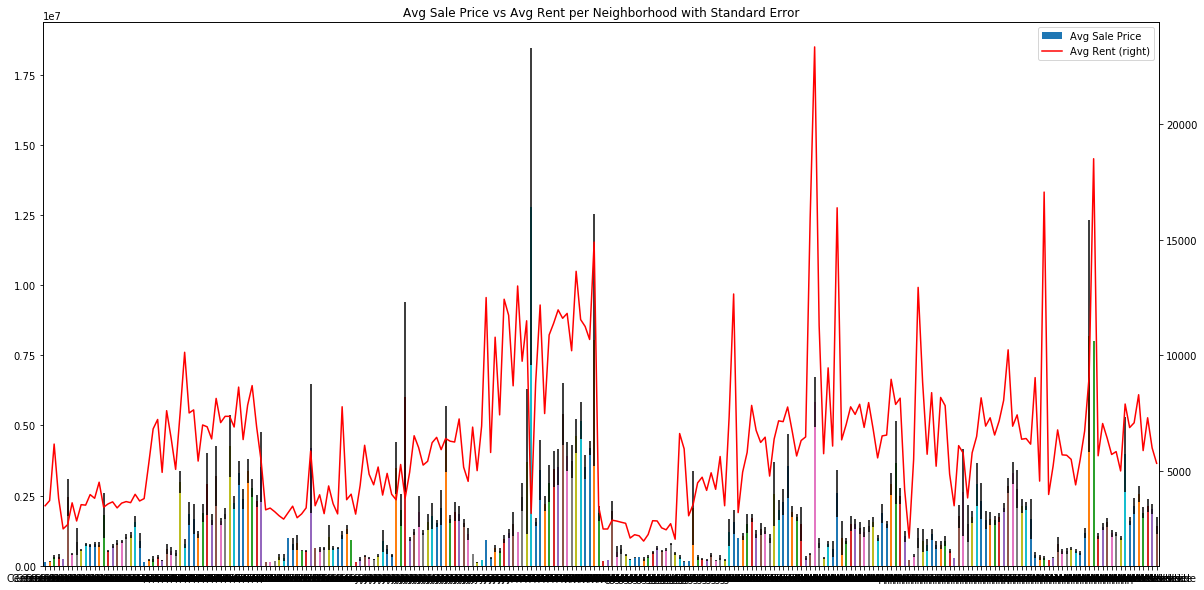

In [24]:
x = np.arange(0, len(z5_df['Neighbor']))
y = z5_df['sold_mean']
y2=z5_df['rent_mean']

# Neighbor	sold year	sold_mean	sold_sem	rent_mean	

z5_df['sold_mean'].plot(kind='bar',label="Avg Sale Price", yerr=z5_df['sold_sem'],legend=True,figsize=(20,10))
z5_df['rent_mean'].plot(secondary_y=True, label="Avg Rent", legend=True,figsize=(20,10),color='r')

tick_locations = x
plt.xticks(tick_locations,z5_df['Neighbor'],rotation=45)
plt.title('Avg Sale Price vs Avg Rent per Neighborhood with Standard Error')

In [25]:
z6_df = z2_df.loc[:,['Neighbor','sold','rent']]
z7_df=z6_df.groupby('Neighbor').agg({'sold':['mean','sem'],'rent':['mean','sem']}).reset_index()
z7_df

Neighbor          sold                         rent  \
                                      mean            sem          mean   
0             Central Harlem  9.649224e+05   53435.768325   3798.781646   
1            Chelsea/Clinton  2.422728e+06  113221.252777   7253.221086   
2                East Harlem  8.424256e+05   65877.416541   3738.945652   
3            Gramercy/Murray  1.704939e+06  109876.841541   5541.461970   
4             Greenwich/Soho  3.375936e+06  138595.751688  10722.288184   
5  Inwood/Washington Heights  6.938348e+05   31118.153000   2681.476323   
6             Lower Eastside  1.527841e+06   88987.054039   5983.074786   
7            Lower Manhattan  1.826134e+06  128742.607620   7665.080119   
8             Upper Eastside  1.994013e+06   77787.591409   6878.804004   
9             Upper Westside  1.742250e+06   95929.511659   6386.022851   

               
          sem  
0   61.703762  
1  114.299462  
2  160.081154  
3  110.845639  
4  224.189570  
5   60.486124  
6  155.374049  
7  240.674824  
8  141.269604  
9  130.034085

In [26]:
z7_df.columns = ["_".join(x) for x in z7_df.columns.ravel()]
z7_df

,Neighbor_,sold_mean,sold_sem,rent_mean,rent_sem
0,Central Harlem,9.649224e+05,53435.768325,3798.781646,61.703762
1,Chelsea/Clinton,2.422728e+06,113221.252777,7253.221086,114.299462
2,East Harlem,8.424256e+05,65877.416541,3738.945652,160.081154
3,Gramercy/Murray,1.704939e+06,109876.841541,5541.461970,110.845639
4,Greenwich/Soho,3.375936e+06,138595.751688,10722.288184,224.189570
5,Inwood/Washington Heights,6.938348e+05,31118.153000,2681.476323,60.486124
6,Lower Eastside,1.527841e+06,88987.054039,5983.074786,155.374049
7,Lower Manhattan,1.826134e+06,128742.607620,7665.080119,240.674824
8,Upper Eastside,1.994013e+06,77787.591409,6878.804004,141.269604
9,Upper Westside,1.742250e+06,95929.511659,6386.022851,130.034085


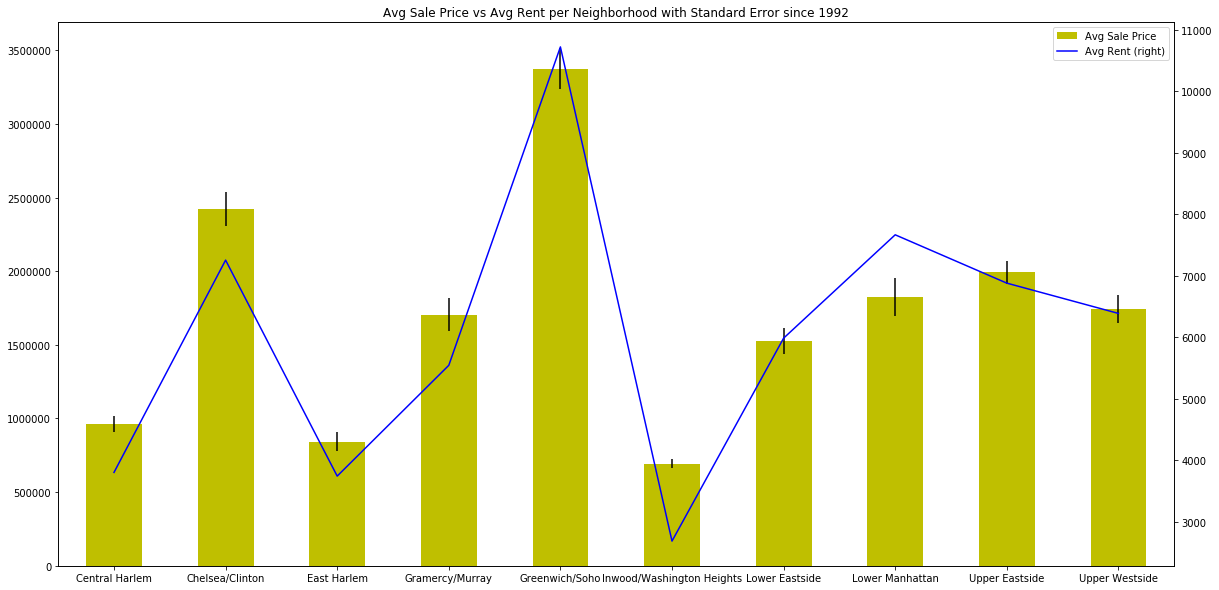

In [27]:
x5 = np.arange(0, len(z7_df['Neighbor_']))
y5 = z7_df['sold_mean']
y6=z7_df['rent_mean']

z7_df['sold_mean'].plot(kind='bar',label="Avg Sale Price", yerr=z7_df['sold_sem'],legend=True,figsize=(20,10),color='y')
z7_df['rent_mean'].plot(secondary_y=True, label="Avg Rent", legend=True,figsize=(20,10),color='b')

tick_locations = x5
plt.xticks(tick_locations,z7_df['Neighbor_'],rotation=45)
plt.title('Avg Sale Price vs Avg Rent per Neighborhood with Standard Error since 1992')
plt.savefig('Avg Sale Price vs Avg Rent per Neighborhood with Standard Error since 1992.png')

In [28]:

z8_df = z2_df.loc[:,['rent','sold','Neighbor','sqft','sold year']]
z9_df=z8_df[z8_df['sold year']>2015.0].dropna()
z9_df.head()
# z9_df.dropna() # removed NaN

,rent,sold,Neighbor,sqft,sold year
1,14995.0,4844809.0,Lower Eastside,2183.0,2018.0
3,23000.0,6100000.0,Lower Eastside,5200.0,2018.0
26,20000.0,6250000.0,Lower Eastside,5446.0,2018.0
44,2749.0,2300000.0,Lower Eastside,2500.0,2017.0
48,3795.0,5850000.0,Lower Eastside,1000.0,2018.0


In [29]:
z10_df = z9_df.loc[:,['Neighbor','rent','sold',]]
z11_df=z10_df.groupby('Neighbor').agg({'sold':['mean','sem'],'rent':['mean','sem']}).reset_index()
z11_df.columns = ["_".join(x) for x in z11_df.columns.ravel()]
z11_df

,Neighbor_,sold_mean,sold_sem,rent_mean,rent_sem
0,Central Harlem,1.407504e+06,138890.787940,3889.373832,133.006574
1,Chelsea/Clinton,2.668376e+06,170504.412110,7444.140266,232.651964
2,East Harlem,1.109410e+06,96342.282781,4273.056818,442.108031
3,Gramercy/Murray,1.613541e+06,113989.690175,5562.608911,191.314261
4,Greenwich/Soho,4.407384e+06,244563.317534,11043.185654,382.608172
5,Inwood/Washington Heights,7.496290e+05,36737.519891,2686.112782,76.389629
6,Lower Eastside,1.874989e+06,125469.956066,5942.172107,261.217168
7,Lower Manhattan,2.911864e+06,405046.966015,8311.551020,464.478535
8,Upper Eastside,2.178073e+06,134700.689894,6497.547591,234.806579
9,Upper Westside,2.010958e+06,138597.081986,6169.835971,231.500890


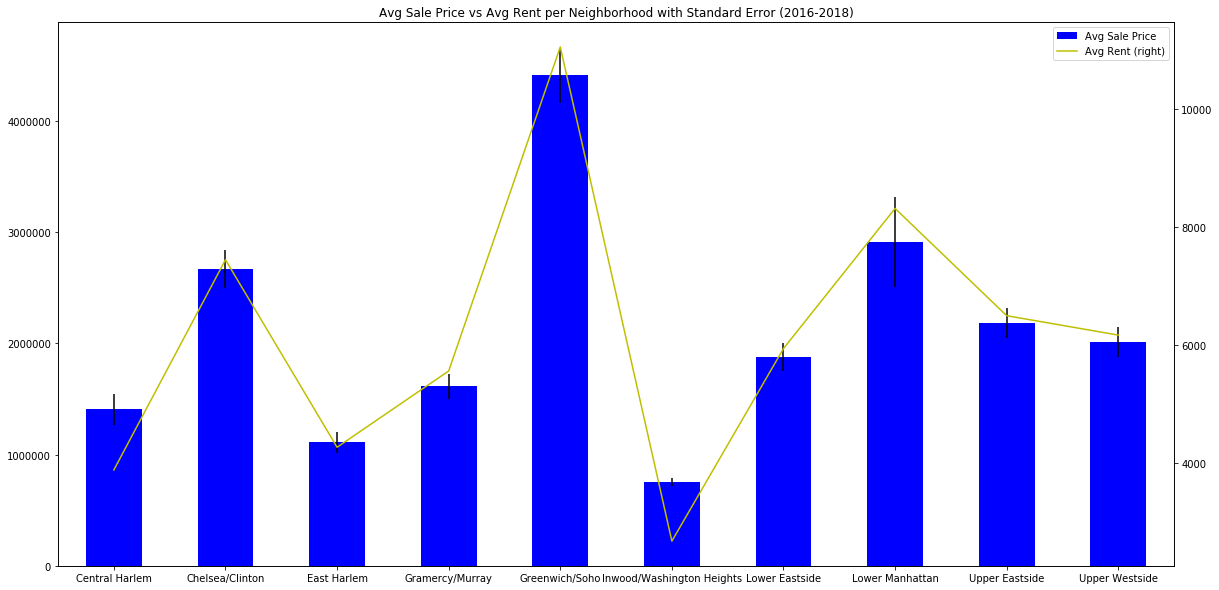

In [30]:
x11 = np.arange(0, len(z11_df['Neighbor_']))
y11 = z11_df['sold_mean']
y12=z11_df['rent_mean']

z11_df['sold_mean'].plot(kind='bar',label="Avg Sale Price", yerr=z11_df['sold_sem'],legend=True,figsize=(20,10),color='b')
z11_df['rent_mean'].plot(secondary_y=True, label="Avg Rent", legend=True,figsize=(20,10),color='y')

tick_locations = x11
plt.xticks(tick_locations,z11_df['Neighbor_'],rotation=45)
plt.title('Avg Sale Price vs Avg Rent per Neighborhood with Standard Error (2016-2018)')
plt.savefig('Avg Sale Price vs Avg Rent per Neighborhood with Standard Error (2016-2018).png')